# Vector Borne Disease Prediction based on Symptoms
# 19BCE1688 M Sharath Srivatsan
# 19BCE1695 Navin Thomsy

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import seaborn as sns
import pandas as pd
import os

In [2]:
#Here we have the list of the symptoms is listed here in list sy1.

sy1=['sudden_fever','headache','mouth_bleed','nose_bleed','muscle_pain',
   'joint_pain','vomiting','rash','diarrhea','hypotension','pleural_effusion','ascites',
   'gastro_bleeding','swelling','nausea','chills','myalgia','digestion_trouble',
   'fatigue','skin_lesions','stomach_pain','orbital_pain','neck_pain','weakness','back_pain','weight_loss',
   'gum_bleed','jaundice','coma','diziness','inflammation','red_eyes','loss_of_appetite','urination_loss',
   'slow_heart_rate','abdominal_pain','light_sensitivity','yellow_skin','yellow_eyes','facial_distortion','microcephaly',
    'rigor','bitter_tongue','convulsion','anemia','cocacola_urine','hypoglycemia','prostraction','hyperpyrexia',
    'stiff_neck','irritability','confusion','tremor','paralysis','lymph_swells','breathing_restriction','toe_inflammation',
    'finger_inflammation','lips_irritation','itchiness','ulcers','toenail_loss','speech_problem','bullseye_rash']

In [3]:
#List of Vector Borne Diseases is listed in list disease.

disease=['Chikungunya','Dengue','Rift Valley fever','Yellow Fever',
         'Zika','Malaria','Japanese encephalitis','West Nile fever',
         'Plague', 'Tungiasis','Lyme disease']

#disease = [df['prognosis'].unique()]
#print(disease)

In [4]:
sy2=[]
for i in range(0,len(sy1)):
    sy2.append(0)
print(sy2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Dataset Link: https://www.kaggle.com/datasets/richardbernat/vector-borne-disease-prediction

In [5]:
df=pd.read_csv("trainn.csv")
DF= pd.read_csv('trainn.csv', index_col='prognosis')

df.replace({'prognosis':{'Chikungunya':0,'Dengue':1,'Rift Valley fever':2,'Yellow Fever':3,'Zika':4,
    'Malaria':5,'Japanese encephalitis':6,'West Nile fever':7,'Plague':8,'Tungiasis':9,'Lyme disease':10,}},inplace=True)
DF.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
prognosis,,,,,,,,,,,,,,,,,,,,,
Chikungunya,0,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chikungunya,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Chikungunya,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Chikungunya,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Chikungunya,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

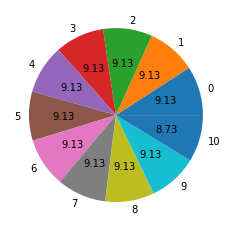

In [6]:
df.groupby('prognosis').size().plot(kind='pie', autopct='%.2f',label='')

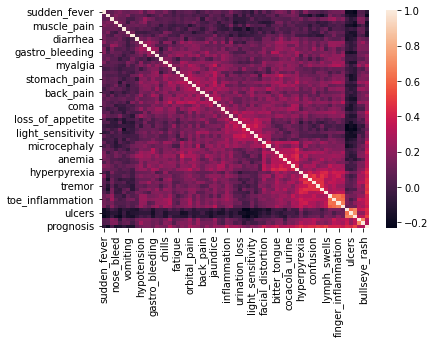

In [7]:
sns.heatmap(df.corr())
plt.show()

In [8]:
# Distribution graph
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [9]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number])
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


C:\Users\shara\AppData\Local\Temp/ipykernel_16320/1114638053.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


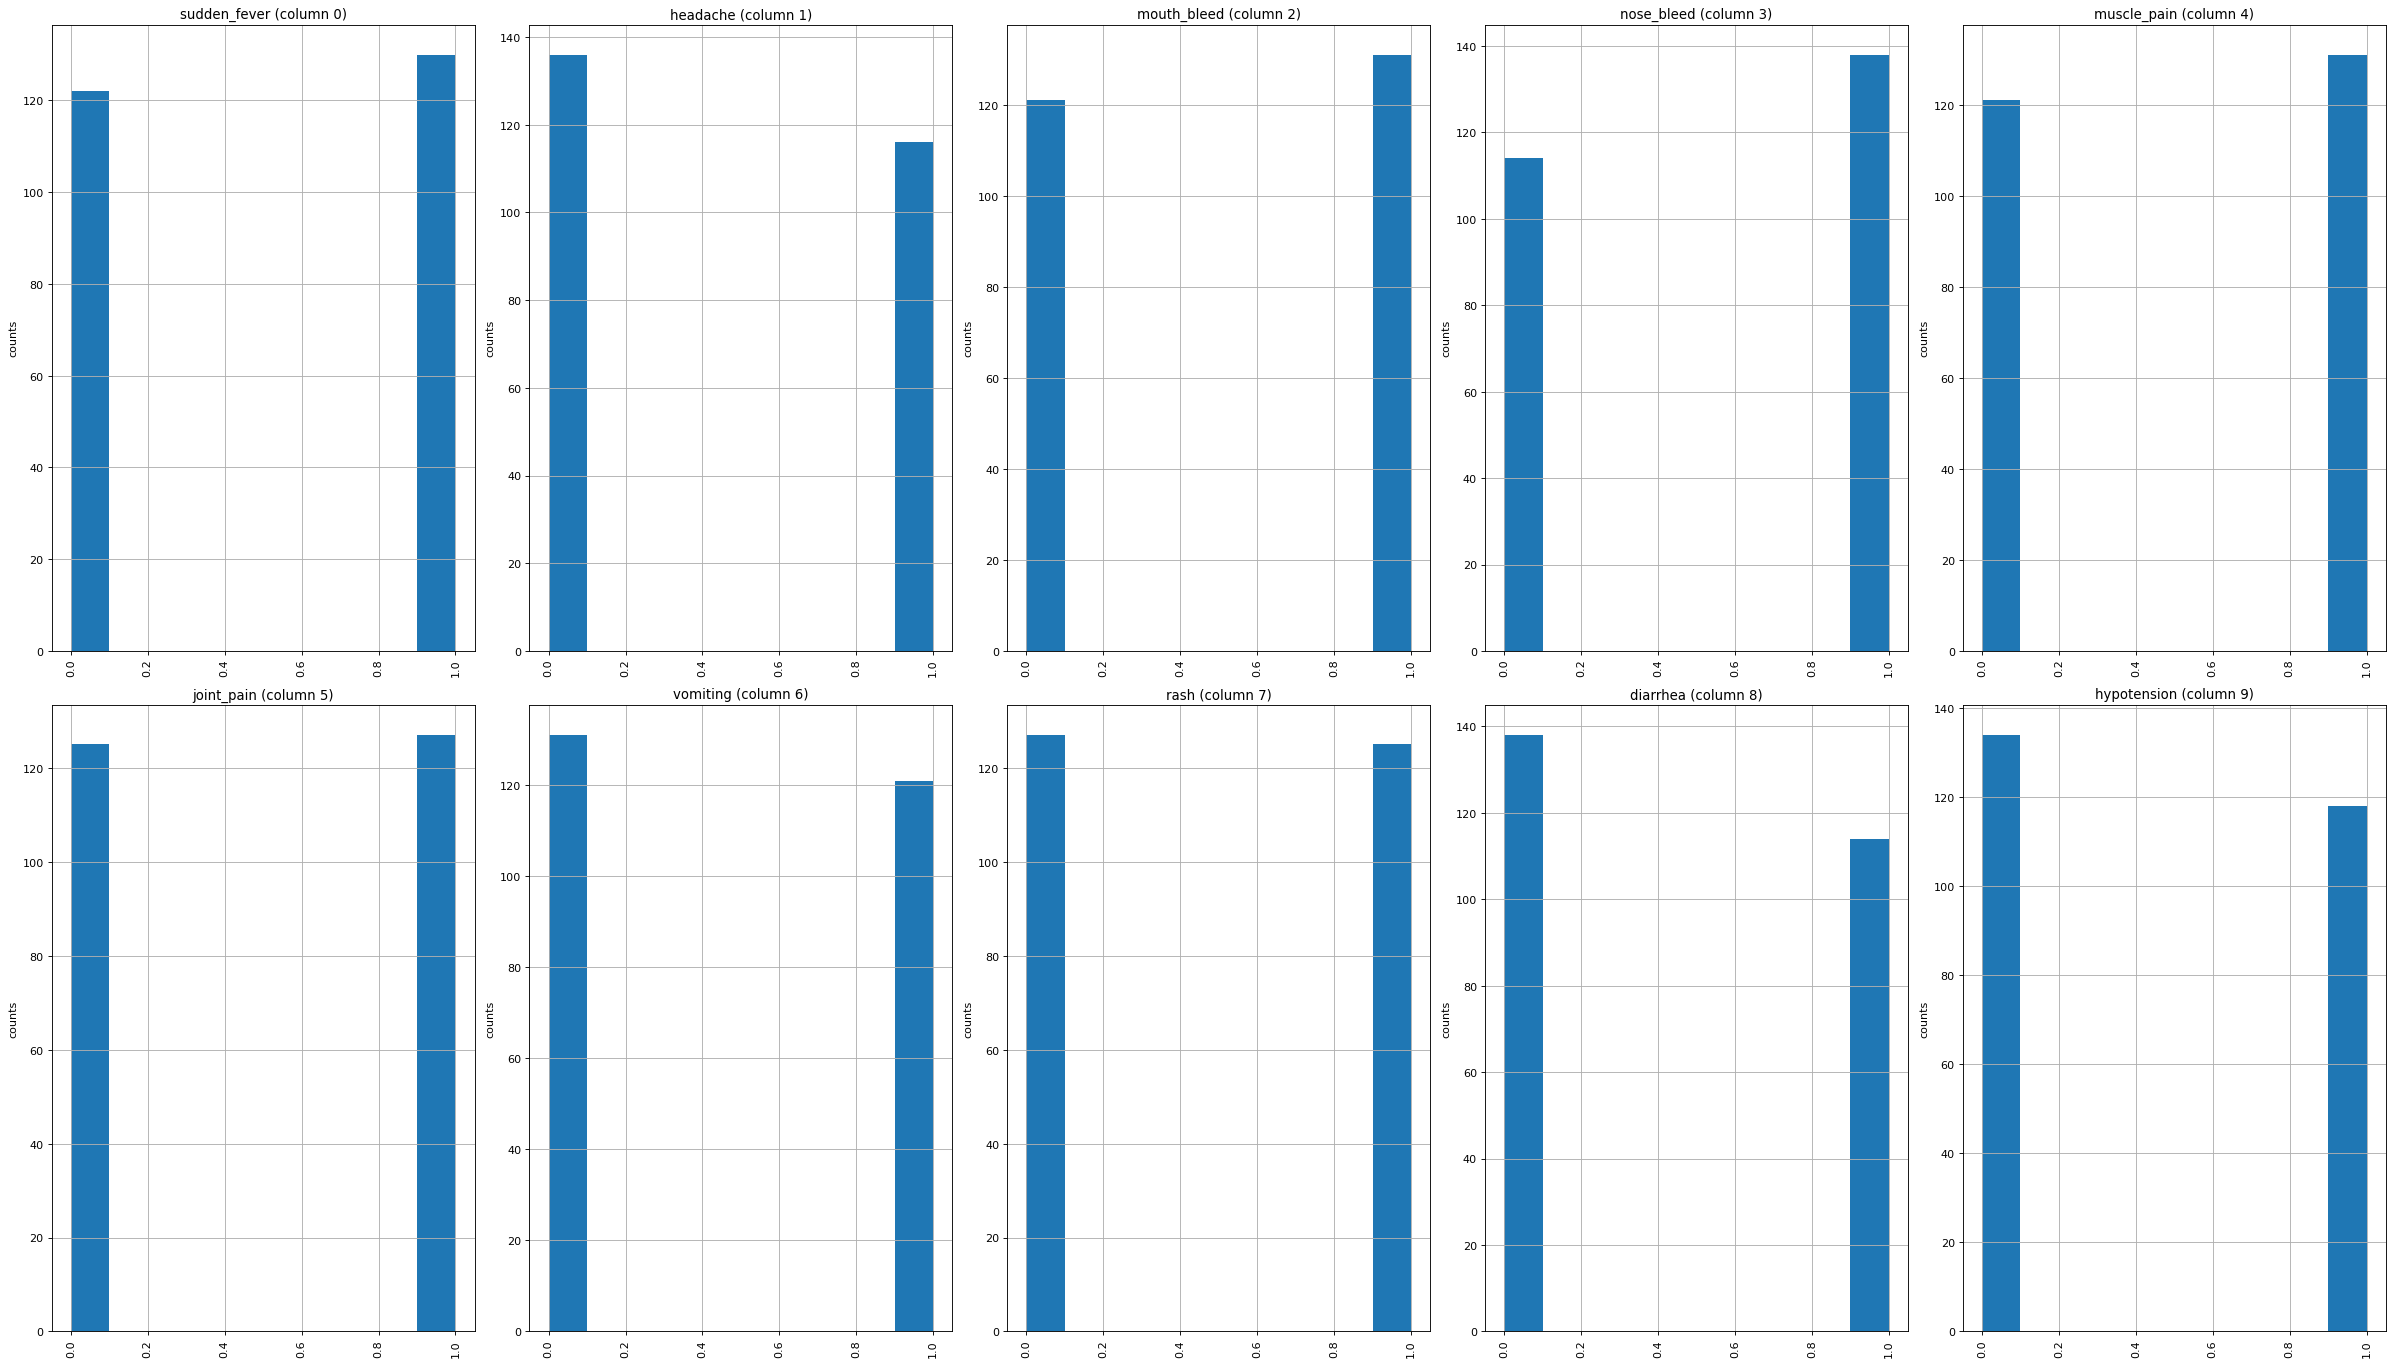

In [10]:
plotPerColumnDistribution(df, 10, 5)

C:\Users\shara\AppData\Local\Temp/ipykernel_16320/1835846070.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df1 = df1.dropna('columns')


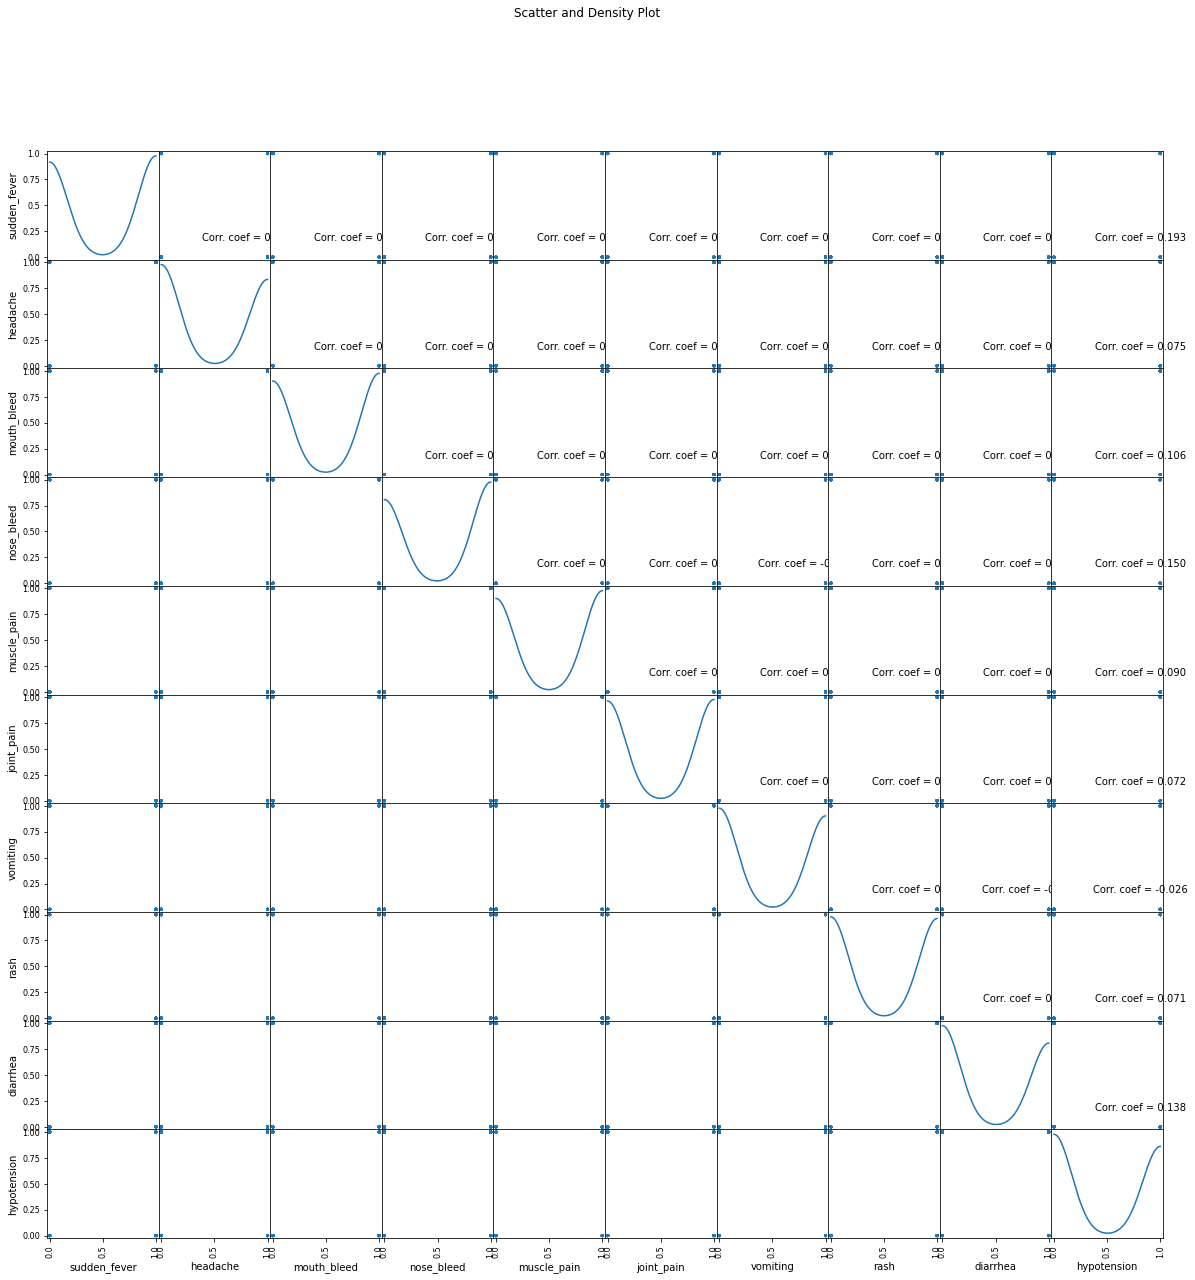

In [11]:
plotScatterMatrix(df, 20, 10)

In [12]:
X= df[sy1]
y = df[["prognosis"]]
np.ravel(y)
print(X)

     sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  joint_pain  \
0               0         1            1           1            1           0   
1               1         1            1           1            1           0   
2               0         1            0           1            0           0   
3               0         0            0           0            0           1   
4               1         0            0           0            1           1   
..            ...       ...          ...         ...          ...         ...   
247             0         0            1           1            0           1   
248             0         1            1           1            1           0   
249             0         1            1           1            0           0   
250             0         0            0           1            0           1   
251             0         0            1           0            1           1   

     vomiting  rash  diarrh

In [13]:
print(y)

     prognosis
0            0
1            0
2            0
3            0
4            0
..         ...
247         10
248         10
249         10
250         10
251         10

[252 rows x 1 columns]


In [14]:
tr=pd.read_csv("testt.csv")

tr.replace({'prognosis':{'Chikungunya':0,'Dengue':1,'Rift Valley fever':2,'Yellow Fever':3,'Zika':4,
    'Malaria':5,'Japanese encephalitis':6,'West Nile fever':7,'Plague':8,'Tungiasis':9,'Lyme disease':10,}},inplace=True)
tr.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,2
3,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


C:\Users\shara\AppData\Local\Temp/ipykernel_16320/1114638053.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


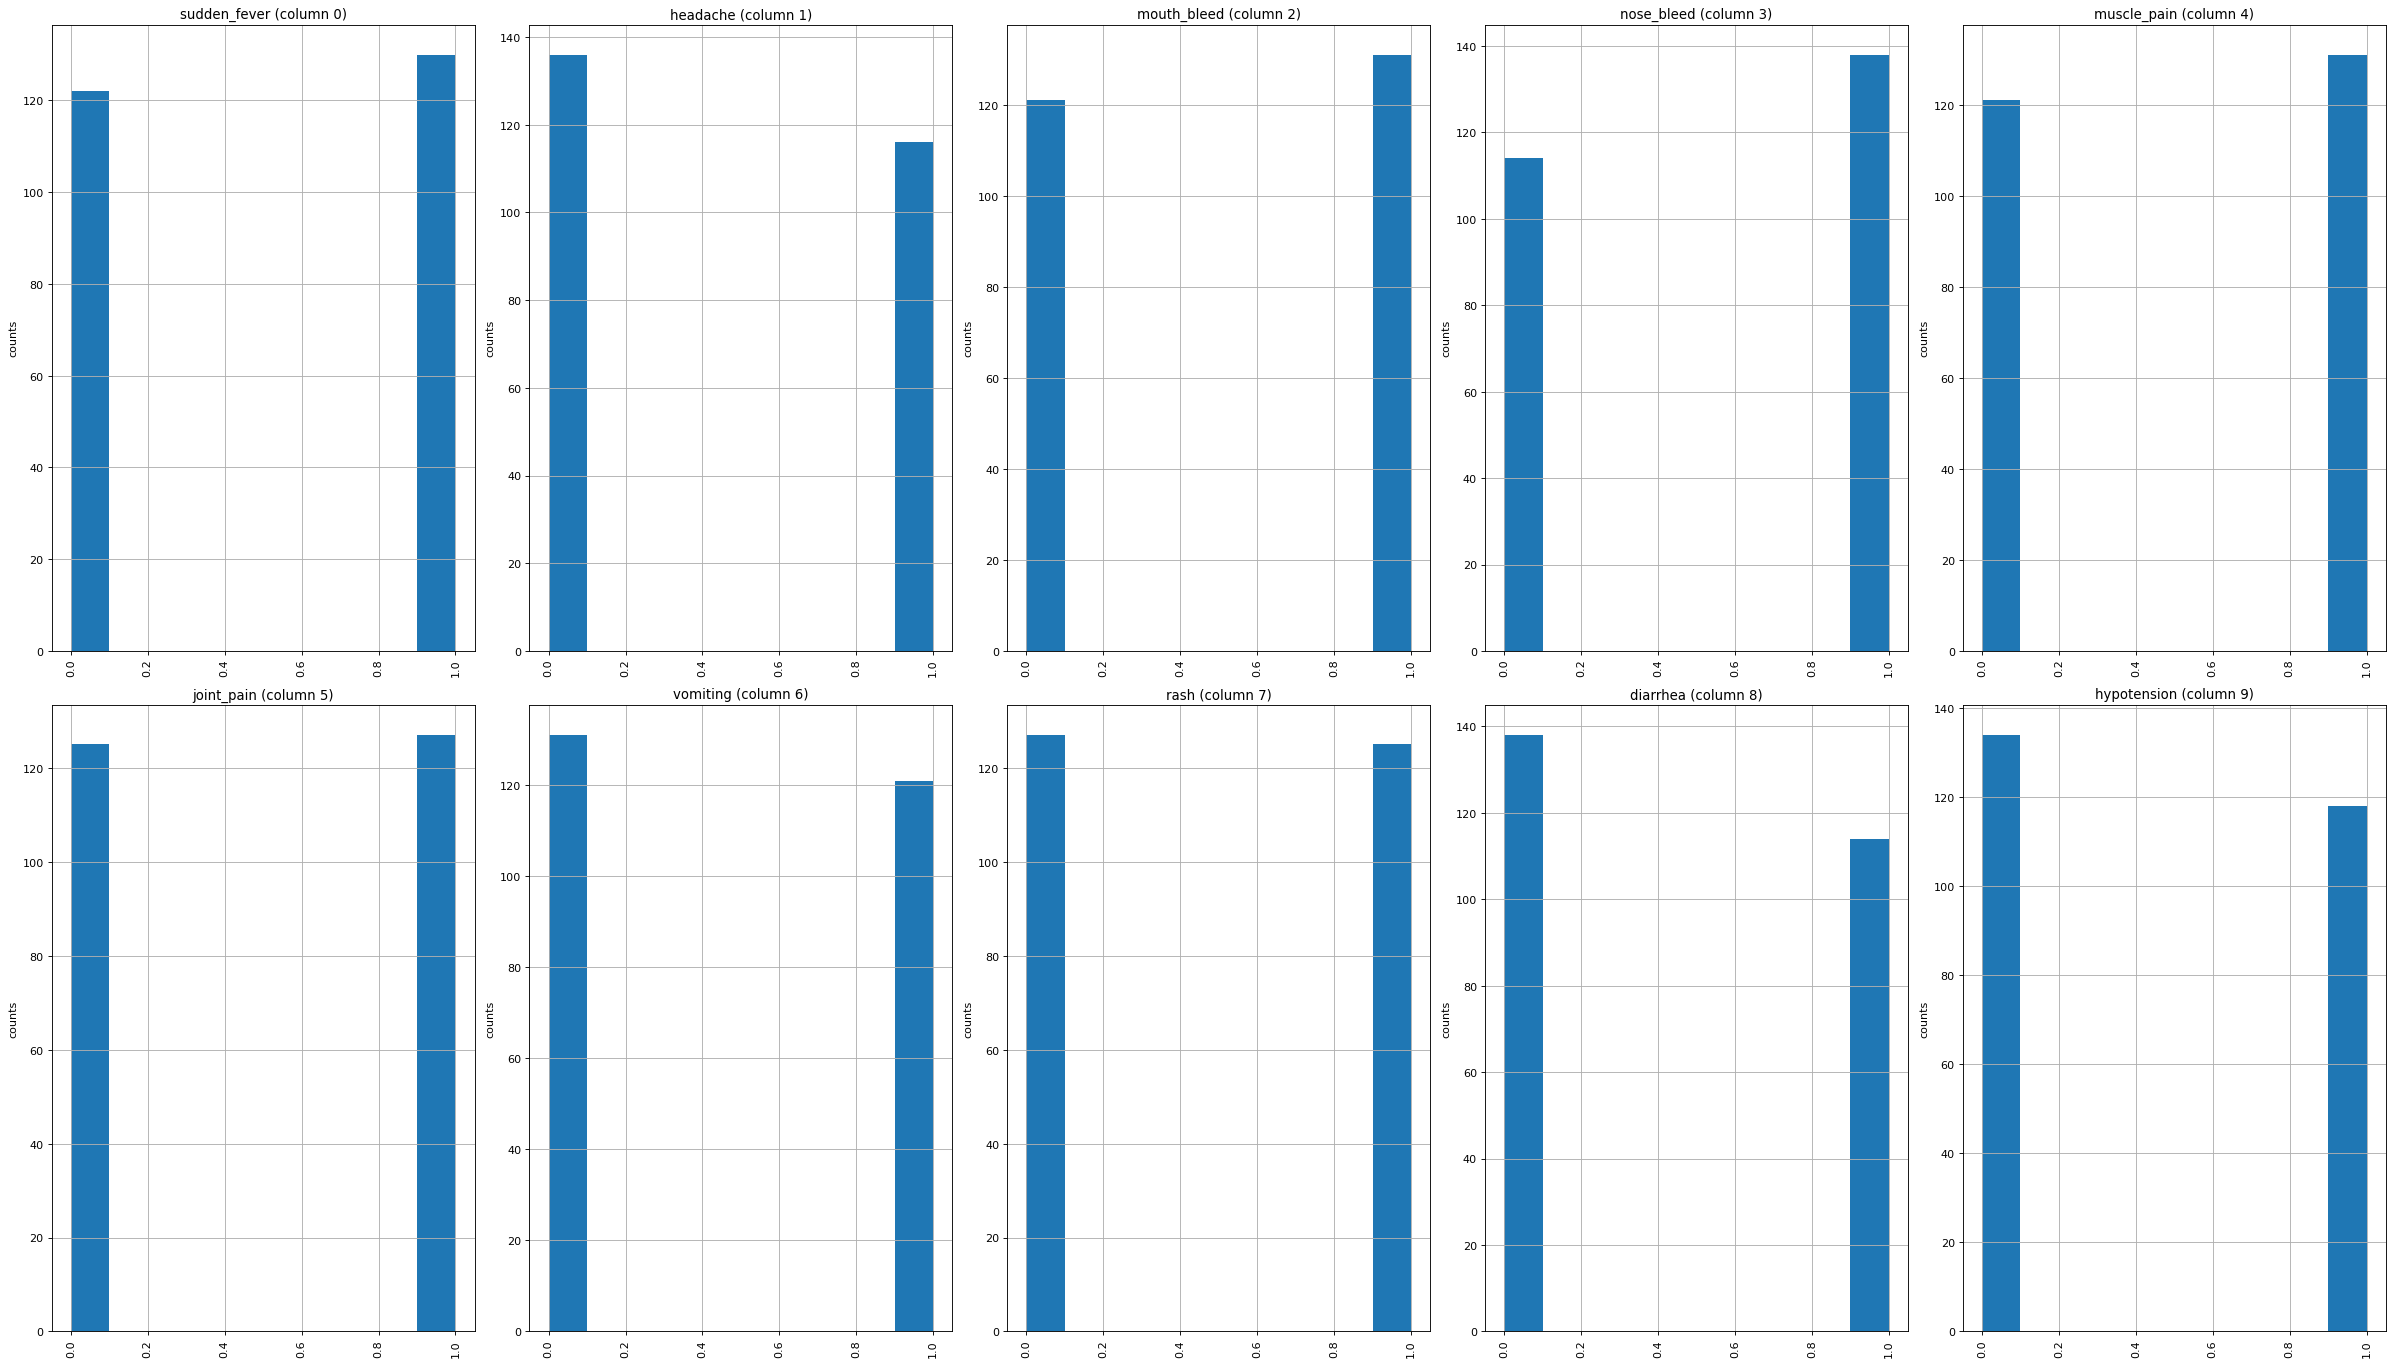

In [15]:
plotPerColumnDistribution(tr, 10, 5)

C:\Users\shara\AppData\Local\Temp/ipykernel_16320/1835846070.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df1 = df1.dropna('columns')


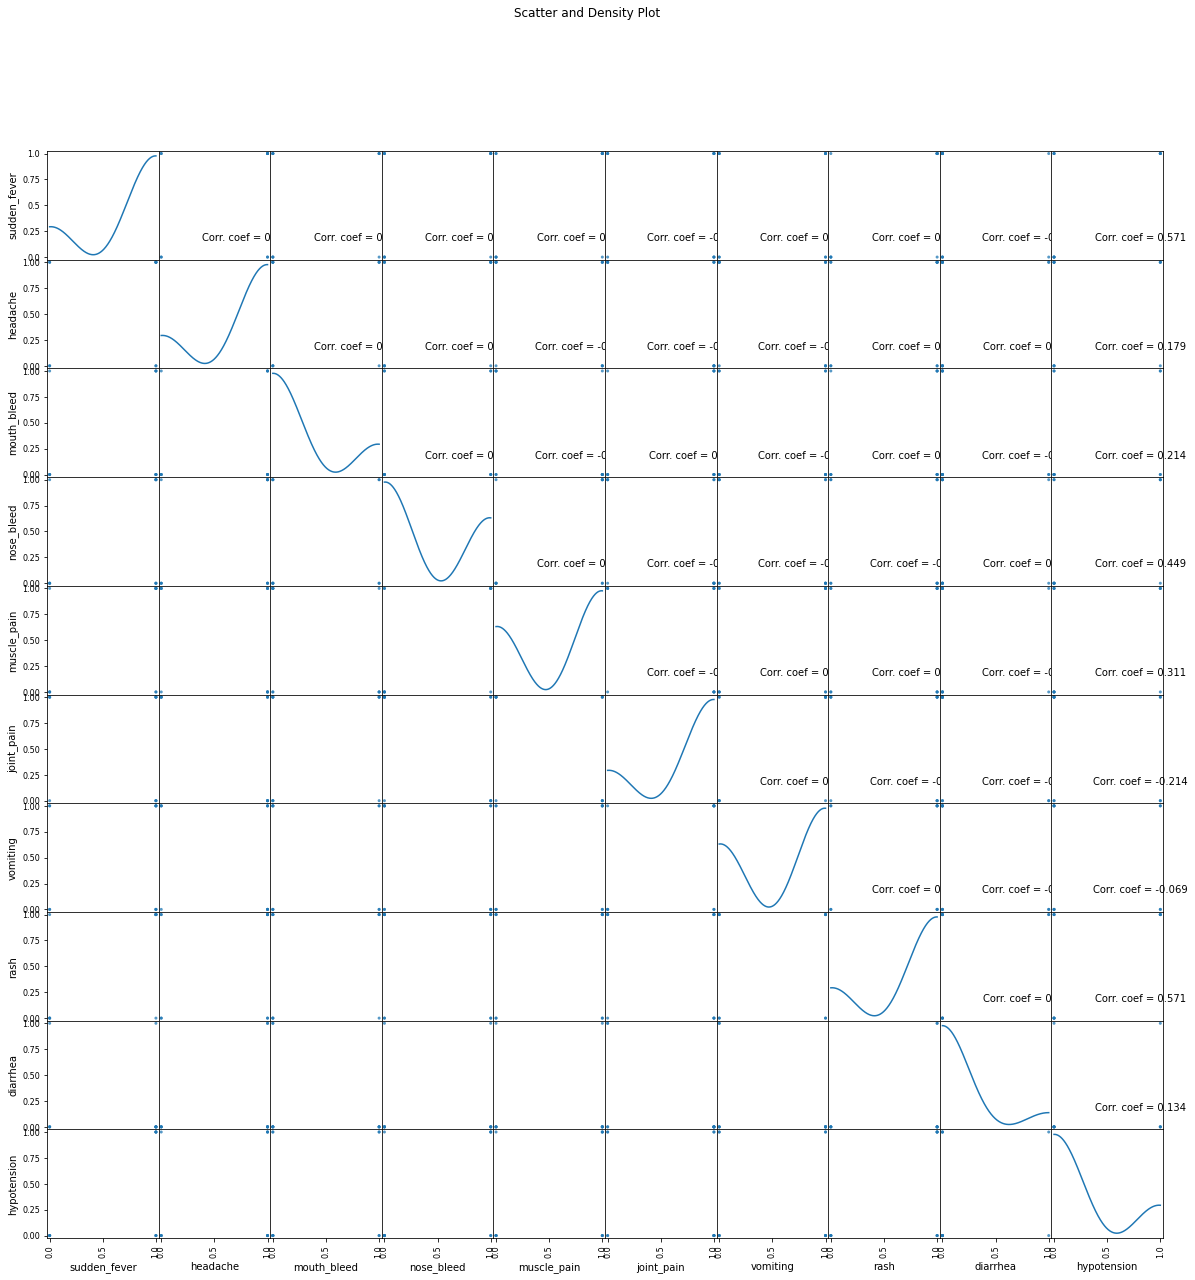

In [16]:
plotScatterMatrix(tr, 20, 10)

In [17]:
X_test= tr[sy1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

    sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  joint_pain  \
0              1         0            0           0            1           1   
1              1         0            0           0            1           1   
2              1         1            1           1            0           1   
3              1         1            0           1            1           0   
4              0         0            1           0            0           1   
5              1         1            0           1            1           0   
6              0         0            0           1            1           1   
7              0         1            0           0            0           1   
8              1         1            1           1            1           0   
9              0         1            0           0            0           0   
10             1         1            1           0            0           1   

    vomiting  rash  diarrhea  hypotensi

In [18]:
print(y_test)

    prognosis
0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10


**To build the precision of the model, we will use these distinctive Machine Learning algorithms which are as per the following**
* Decision Tree algorithm
* Random Forest algorithm
* KNearestNeighbour algorithm
* Naive Bayes algorithm

In [19]:
def scatterplt(disea):
    x = ((DF.loc[disea]).sum())#sum of symptom for disease
    x.drop(x[x==0].index,inplace=True)#dropping symptoms with values 0
    print(x.values)
    y = x.keys()
    print(len(x))
    print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]
    y = [0,0,0,0,0]
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()

# Decision Tree Algorithm

In [20]:
root = Tk()
pred1=StringVar()
def DecisionTree():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn import tree

        clf3 = tree.DecisionTreeClassifier() 
        clf3 = clf3.fit(X,y)

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf3.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(sy1)):
            for z in psymptoms:
                if(z==sy1[k]):
                    sy2[k]=1

        inputtest = [sy2]
        predict = clf3.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break

    
        if (h=='yes'):
            pred1.set(" ")
            pred1.set(disease[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO DecisionTree(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred1.get()))
        conn.commit()  
        c.close() 
        conn.close()
        
        #printing scatter plot of input symptoms
        #printing scatter plot of disease predicted vs its symptoms
        scatterinp(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get())
        scatterplt(pred1.get())

# Random Forest Algorithm

In [21]:
pred2=StringVar()
def randomforest():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X,np.ravel(y))

        # calculating accuracy 
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)
    
        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(sy1)):
            for z in psymptoms:
                if(z==sy1[k]):
                    sy2[k]=1

        inputtest = [sy2]
        predict = clf4.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred2.set(" ")
            pred2.set(disease[a])
        else:
            pred2.set(" ")
            pred2.set("Not Found")
         #Creating the database if not exists named as database.db and creating table if not exists named as RandomForest using sqlite3
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO RandomForest(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred2.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred2.get())

# KNearestNeighbour Algorithm

In [22]:
pred4=StringVar()
def KNN():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.neighbors import KNeighborsClassifier
        knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
        knn=knn.fit(X,np.ravel(y))
    
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=knn.predict(X_test)
        print("kNearest Neighbour")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(sy1)):
            for z in psymptoms:
                if(z==sy1[k]):
                    sy2[k]=1

        inputtest = [sy2]
        predict = knn.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break


        if (h=='yes'):
            pred4.set(" ")
            pred4.set(disease[a])
        else:
            pred4.set(" ")
            pred4.set("Not Found")
         #Creating the database if not exists named as database.db and creating table if not exists named as KNearestNeighbour using sqlite3   
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS KNearestNeighbour(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO KNearestNeighbour(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred4.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        
        scatterplt(pred4.get())

# Naive Bayes Algorithm

In [23]:
pred3=StringVar()
def NaiveBayes():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb=gnb.fit(X,np.ravel(y))

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=gnb.predict(X_test)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
        for k in range(0,len(sy1)):
            for z in psymptoms:
                if(z==sy1[k]):
                    sy2[k]=1

        inputtest = [sy2]
        predict = gnb.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred3.set(" ")
            pred3.set(disease[a])
        else:
            pred3.set(" ")
            pred3.set("Not Found")
         #Creating the database if not exists named as database.db and creating table if not exists named as NaiveBayes using sqlite3
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS NaiveBayes(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO NaiveBayes(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred3.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred3.get())

# Building Graphical User Interface

In [24]:
#Tk class is used to create a root window
root.configure(background='ivory2')
root.title('Vector Borne Disease Predictor')
root.resizable(0,0)

''

In [25]:
Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")

Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")
Name = StringVar()

In [26]:
prev_win=None
def Reset():
    global prev_win

    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    NameEn.delete(first=0,last=100)
    pred1.set(" ")
    pred2.set(" ")
    pred3.set(" ")
    pred4.set(" ")
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass

In [27]:
from tkinter import messagebox
def Exit():
    qExit=messagebox.askyesno("System","Do you want to exit the system")
    
    if qExit:
        root.destroy()
        exit()

In [28]:
#Headings for the GUI written at the top of GUI
w2 = Label(root, justify=CENTER, text="Vector Borne Disease Predictor", fg="Black",bg="ivory2")
w2.config(font=("Arial",30,"bold"))
w2.grid(row=1, column=1, columnspan=2, padx=100)
w2 = Label(root, justify=CENTER, text="Contributors: Sharath and Navin", fg="Black",bg="ivory2")
w2.config(font=("Segoe UI",20,"bold italic"))
w2.grid(row=2, column=1, columnspan=2, padx=100)

In [29]:
#Label for the name
NameLb = Label(root, text="Name of the Patient *", fg="Black", bg="ivory2")
NameLb.config(font=("Times",15,"bold"))
NameLb.grid(row=6, column=0, pady=15,padx=10,sticky=W)

In [30]:

#Creating Labels for the symtoms
S1Lb = Label(root, text="Symptom 1 *", fg="Black", bg="ivory2")
S1Lb.config(font=("Times",15,"bold"))
S1Lb.grid(row=7, column=0, pady=20,padx=10, sticky=W)

S2Lb = Label(root, text="Symptom 2 *", fg="Black", bg="ivory2")
S2Lb.config(font=("Times",15,"bold"))
S2Lb.grid(row=8, column=0, pady=20,padx=10, sticky=W)

S3Lb = Label(root, text="Symptom 3", fg="Black",bg="ivory2")
S3Lb.config(font=("Times",15,"bold"))
S3Lb.grid(row=9, column=0, pady=20,padx=10, sticky=W)

S4Lb = Label(root, text="Symptom 4", fg="Black", bg="ivory2")
S4Lb.config(font=("Times",15,"bold"))
S4Lb.grid(row=10, column=0, pady=20,padx=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="Black", bg="ivory2")
S5Lb.config(font=("Times",15,"bold"))
S5Lb.grid(row=11, column=0, pady=20,padx=10, sticky=W)

In [31]:
#Labels for the different algorithms
lrLb = Label(root, text="DecisionTree", fg="white", bg="RoyalBlue1", width = 20)
lrLb.config(font=("Times",15,"bold italic"))
lrLb.grid(row=15, column=0, pady=10,padx=10,sticky=W)

destreeLb = Label(root, text="RandomForest", fg="white", bg="RoyalBlue2", width = 20)
destreeLb.config(font=("Times",15,"bold italic"))
destreeLb.grid(row=17, column=0, pady=10,padx=10, sticky=W)

ranfLb = Label(root, text="NaiveBayes", fg="white", bg="RoyalBlue3", width = 20)
ranfLb.config(font=("Times",15,"bold italic"))
ranfLb.grid(row=19, column=0, pady=10,padx=10, sticky=W)

knnLb = Label(root, text="kNearestNeighbour", fg="white", bg="RoyalBlue4", width = 20)
knnLb.config(font=("Times",15,"bold italic"))
knnLb.grid(row=20, column=0, pady=10,padx=10, sticky=W)
OPTIONS = sorted(sy1)

In [32]:
#Taking name as input from user
NameEn = Entry(root, textvariable=Name)
NameEn.grid(row=6, column=1)

#Taking Symptoms as input from the dropdown from the user
S1 = OptionMenu(root, Symptom1,*OPTIONS)
S1.grid(row=7, column=1)

S2 = OptionMenu(root, Symptom2,*OPTIONS)
S2.grid(row=8, column=1)

S3 = OptionMenu(root, Symptom3,*OPTIONS)
S3.grid(row=9, column=1)

S4 = OptionMenu(root, Symptom4,*OPTIONS)
S4.grid(row=10, column=1)

S5 = OptionMenu(root, Symptom5,*OPTIONS)
S5.grid(row=11, column=1)

In [33]:
#Buttons for predicting the disease using different algorithms
dst = Button(root, text="Prediction 1", command=DecisionTree,bg="purple1",fg="white")
dst.config(font=("Times",15,"bold italic"))
dst.grid(row=7, column=3,padx=10)

rnf = Button(root, text="Prediction 2", command=randomforest,bg="purple2",fg="white")
rnf.config(font=("Times",15,"bold italic"))
rnf.grid(row=8, column=3,padx=10)

lr = Button(root, text="Prediction 3", command=NaiveBayes,bg="purple3",fg="white")
lr.config(font=("Times",15,"bold italic"))
lr.grid(row=9, column=3,padx=10)

kn = Button(root, text="Prediction 4", command=KNN,bg="purple4",fg="white")
kn.config(font=("Times",15,"bold italic"))
kn.grid(row=10, column=3,padx=10)

rs = Button(root,text="Reset Inputs", command=Reset,bg="gold",fg="black",width=15)
rs.config(font=("Times",15,"bold italic"))
rs.grid(row=11,column=3,padx=10)

ex = Button(root,text="Exit System", command=Exit,bg="red2",fg="white",width=15)
ex.config(font=("Times",15,"bold italic"))
ex.grid(row=20,column=3,padx=10)

In [34]:
#Showing the output of different algos
t1=Label(root,font=("Times",15,"bold italic"),text="Decision Tree",height=1,bg="azure"
         ,width=40,fg="black",textvariable=pred1,relief="sunken").grid(row=15, column=1, padx=10)

t2=Label(root,font=("Times",15,"bold italic"),text="Random Forest",height=1,bg="azure"
         ,width=40,fg="black",textvariable=pred2,relief="sunken").grid(row=17, column=1, padx=10)

t3=Label(root,font=("Times",15,"bold italic"),text="Naive Bayes",height=1,bg="azure"
         ,width=40,fg="black",textvariable=pred3,relief="sunken").grid(row=19, column=1, padx=10)

t4=Label(root,font=("Times",15,"bold italic"),text="kNearest Neighbour",height=1,bg="azure"
         ,width=40,fg="black",textvariable=pred4,relief="sunken").grid(row=20, column=1, padx=10)

Decision Tree
Accuracy
1.0
11
Confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]
['gastro_bleeding', 'hyperpyrexia', 'inflammation', 'jaundice', 'lips_irritation']
[1, 1, 1, 1, 1]


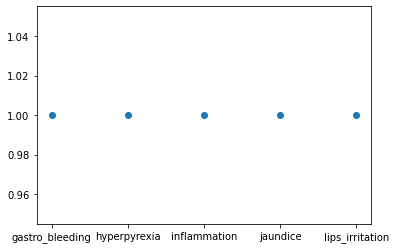

[14 14 12 17 14 15 17 18  6  1  2  1 13  7  1  1]
16
16


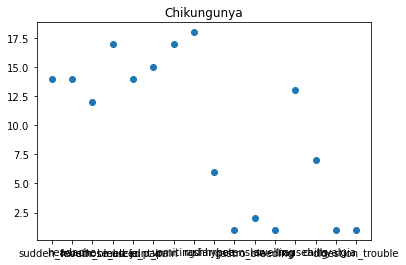

Random Forest
Accuracy
1.0
11
Confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]
[14 14 12 17 14 15 17 18  6  1  2  1 13  7  1  1]
16
16


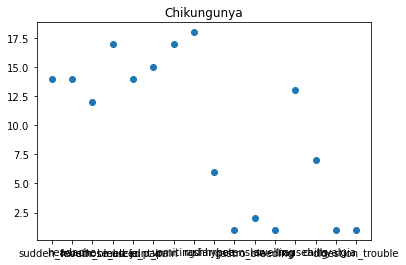

Naive Bayes
Accuracy
0.9090909090909091
10
Confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]
[10 13 14 13  9 11 11 13  7 12 10 10 11 13  9 15 11 14 19 15 17 14 16 19
 17 14 18 19 11 12  3  5  1  2  5  7  3  2  3  3  4  3  7  3  6  2  5  3
  3  7  4  3  4  2  2  3  4  6  7  3  3  4  6]
63
63


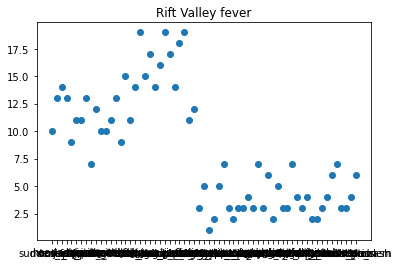

kNearest Neighbour
Accuracy
0.7272727272727273
8
Confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]
[14 14 12 17 14 15 17 18  6  1  2  1 13  7  1  1]
16
16


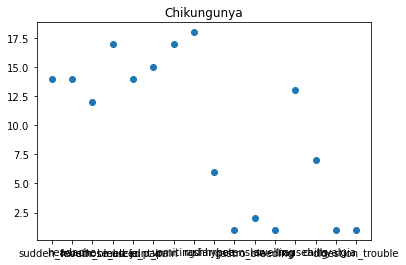

In [ ]:
root.mainloop()